# Green OA Analysis


Now with a fully constructed CSV file can see what we are up against.

Caveats to this point
- `Journal Article` with a `DOI`
- `ORCID` with a `current affiliation` of Brock University
- Policy Finder indicated that `institutional repository` was an option for a policy

## Dataframes built


|Variable Name | Contents |
|-----|-----|
|`doi_df`|ORCID + DOI + Policy Finder with caveats above|
|`doi_green_eligible`| ORCID + DOI + Policy Finder with caveats above, not already open access|
|`doi_green_eligible_free`| ORCID + DOI + Policy Finder with caveats above, not already open access, with at least one free pathway|


In [1]:
# @title CSV input

csv_url = "https://raw.githubusercontent.com/elibtronic/green_oa_compiler/refs/heads/main/Brock_ORCID_Harvest_Start_Date_2025-01-01_to_2025-08-26.csv" # @param {"type":"string","placeholder":"https://raw.githubusercontent.com/elibtronic/green_oa_compiler/refs/heads/main/Brock_ORCID_Harvest_Start_Date_2025-01-01_to_2025-07-21.csv"}


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#all augmented data
doi_df = pd.read_csv(csv_url)

#items with some sort of pathway not already OA
doi_green_eligible = doi_df[doi_df['submitted_oa_policy'].notnull() | doi_df['accepted_oa_policy'].notnull() | doi_df['published_oa_policy'].notnull()]
doi_green_eligible = doi_green_eligible[doi_green_eligible['standard_url'] != "creativecommons.org"]
doi_green_eligible.reset_index()

#eligible with at least 1 free route
doi_green_eligible_free = doi_green_eligible[doi_green_eligible['submitted_oa_policy'].str.contains('fee_no', case=False) | doi_green_eligible['accepted_oa_policy'].str.contains('fee_no', case=False) | doi_green_eligible['published_oa_policy'].str.contains('fee_no', case=False)]
doi_green_eligible_free.reset_index()

print("Done Loading and creating Dataframes")

Done Loading and creating Dataframes


In [2]:
#Whole Dataset
doi_df.sample(2)

,ORCID,DOI,issn,LICENSE_URL,standard_url,policy_uri,submitted_oa_policy,accepted_oa_policy,published_oa_policy
473,0000-0003-1476-2965,10.1017/jmo.2017.7,1833-3672,https://www.cambridge.org/core/terms,www.cambridge.org,https://v2.sherpa.ac.uk/id/publication/28415,NaN,NaN,NaN
13,0000-0002-2953-4845,10.1021/acs.est.4c10360,0013-936X,https://doi.org/10.15223/policy-029,doi.org,https://v2.sherpa.ac.uk/id/publication/7774,NaN,NaN,710:fee_yes:no conditions;


In [3]:
# Not Open Access already, some sort of pathway
doi_green_eligible.sample(2)

,ORCID,DOI,issn,LICENSE_URL,standard_url,policy_uri,submitted_oa_policy,accepted_oa_policy,published_oa_policy
812,0000-0002-5449-3352,10.1111/sms.70005,0905-7188,http://onlinelibrary.wiley.com/termsAndConditi...,onlinelibrary.wiley.com,https://v2.sherpa.ac.uk/id/publication/11901,11204:fee_no:Must acknowledge acceptance for p...,NaN,NaN
94,0000-0002-1577-2658,10.1139/apnm-2021-0301,1715-5312,http://www.nrcresearchpress.com/page/about/Cor...,www.nrcresearchpress.com,https://v2.sherpa.ac.uk/id/publication/10122,8195:fee_no:no conditions;,3875:fee_no:Publisher copyright and source mus...,NaN


In [4]:
#Not Open Access already, with at lease 1 free route
doi_green_eligible_free.sample(2)

,ORCID,DOI,issn,LICENSE_URL,standard_url,policy_uri,submitted_oa_policy,accepted_oa_policy,published_oa_policy
155,0000-0002-4348-7678,10.1113/JP288674,0022-3751,http://onlinelibrary.wiley.com/termsAndConditi...,onlinelibrary.wiley.com,https://v2.sherpa.ac.uk/id/publication/6978,11204:fee_no:Must acknowledge acceptance for p...,NaN,NaN
504,0000-0003-1476-2965,10.1111/j.1540-5885.2012.00986.x,0737-6782,http://onlinelibrary.wiley.com/termsAndConditi...,onlinelibrary.wiley.com,https://v2.sherpa.ac.uk/id/publication/15932,11212:fee_no:May not be updated with Publisher...,11213:fee_no:Publisher source must be acknowle...,NaN


In [109]:
#Items with no found policies
doi_df[doi_df['submitted_oa_policy'].isnull() & doi_df['accepted_oa_policy'].isnull() & doi_df['published_oa_policy'].isnull()].sample(2)

,ORCID,DOI,issn,LICENSE_URL,standard_url,policy_uri,submitted_oa_policy,accepted_oa_policy,published_oa_policy
28,0000-0003-2126-3160,10.1037/cap0000357,1878-7304,http://www.apa.org/pubs/journals/resources/ope...,www.apa.org,https://v2.sherpa.ac.uk/id/publication/3409,NaN,NaN,NaN
800,0000-0002-5449-3352,10.1152/ajpheart.00453.2024,0363-6135,No URL retrieved,NaN,https://v2.sherpa.ac.uk/id/publication/7393,NaN,NaN,NaN


# Subset Data Frames

# Series



In [5]:
#Anything useful we can see by looking at URLs of Licenses?
doi_df.value_counts('standard_url')

,count
standard_url,
creativecommons.org,206
www.elsevier.com,86
www.emerald.com,78
onlinelibrary.wiley.com,54
journals.sagepub.com,45
www.springer.com,37
www.springernature.com,34
www.nrcresearchpress.com,24
doi.org,22


In [6]:
#What journal show up a lot here?
doi_df.value_counts('issn')

,count
issn,
0048-3486,27
1715-5312,20
8750-7587,18
1833-3672,16
1530-0315,14
...,...
0008-4204,1
0008-4077,1
0006-3223,1


In [7]:
#Frequency of authors?
doi_df.value_counts('ORCID')

,count
ORCID,
0000-0003-1476-2965,260
0000-0002-5449-3352,152
0000-0001-6203-5338,59
0000-0002-1577-2658,51
0009-0007-6904-959X,25
...,...
0009-0008-1923-4786,1
0009-0008-7681-5843,1
0009-0009-2327-7890,1


In [8]:
#Frequency of licenses?
doi_df.value_counts('LICENSE_URL')

,count
LICENSE_URL,
No URL retrieved,328
https://www.elsevier.com/tdm/userlicense/1.0/,86
https://www.emerald.com/insight/site-policies,78
https://creativecommons.org/licenses/by/4.0/,70
http://onlinelibrary.wiley.com/termsAndConditions#vor,53
http://creativecommons.org/licenses/by/4.0/,46
https://journals.sagepub.com/page/policies/text-and-data-mining-license,45
https://www.springernature.com/gp/researchers/text-and-data-mining,34
http://creativecommons.org/licenses/by-nc-nd/4.0/,27


In [9]:
#Will caching DOI's help? -> No
#doi_df['DOI'].value_counts()


# Magnitudes

In [10]:
#Items missing licenses from DOI
print(doi_df.eval(['LICENSE_URL == "No URL retrieved"']).sum())

328


In [11]:
#items missing issns
print(doi_df.eval(['issn == "No ISSN found"']).sum())

13


In [12]:
#Items already OA
doi_df.eval(['standard_url == "creativecommons.org"']).sum()

206

In [13]:
#Items with free pathways
doi_green_eligible[doi_green_eligible['submitted_oa_policy'].str.contains('fee_no', case=False) | doi_green_eligible['accepted_oa_policy'].str.contains('fee_no', case=False) | doi_green_eligible['published_oa_policy'].str.contains('fee_no', case=False)][['DOI']].count()

,0
DOI,186


In [14]:
# Items with no policy data
doi_df[doi_df['submitted_oa_policy'].isnull() & doi_df['accepted_oa_policy'].isnull() & doi_df['published_oa_policy'].isnull()][['DOI']].count()

,0
DOI,400


# Graphs

In [89]:
#Set colors just once
colors = sns.color_palette('inferno_r')[0:5]
color = sns.color_palette('inferno_r')[0]

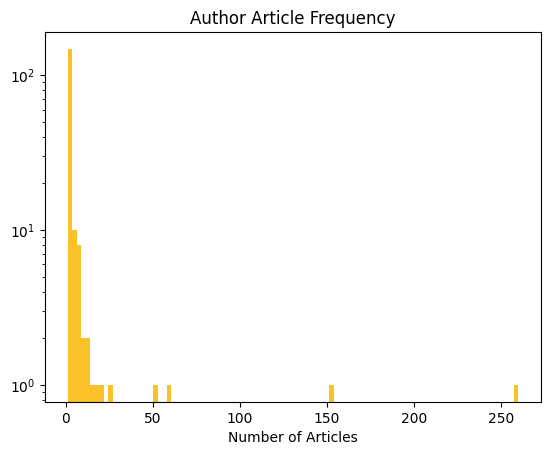

In [102]:
plt.hist(doi_df['ORCID'].value_counts(), bins=100,color=color,log=True)
plt.title("Author Article Frequency")
plt.xlabel("Number of Articles")
#plt.ylabel("Number of Authors")
plt.show()

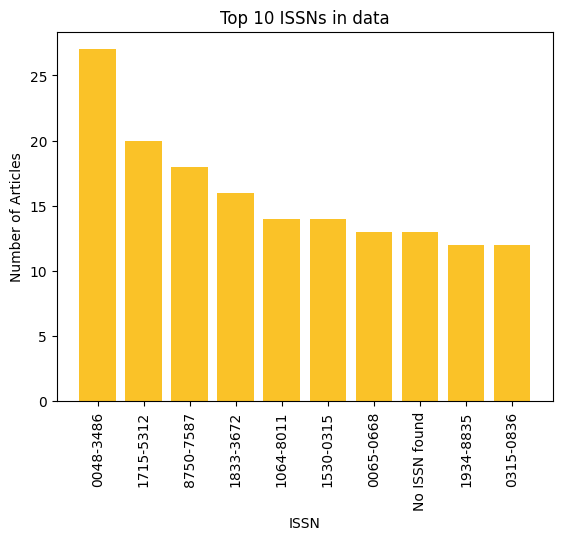

In [104]:
plt.bar(doi_df['issn'].value_counts().index[:10], doi_df['issn'].value_counts().values[:10],color=color)
plt.title("Top 10 ISSNs in data")
plt.ylabel("Number of Articles")
plt.xlabel("ISSN")
plt.xticks(rotation=90)
plt.show()

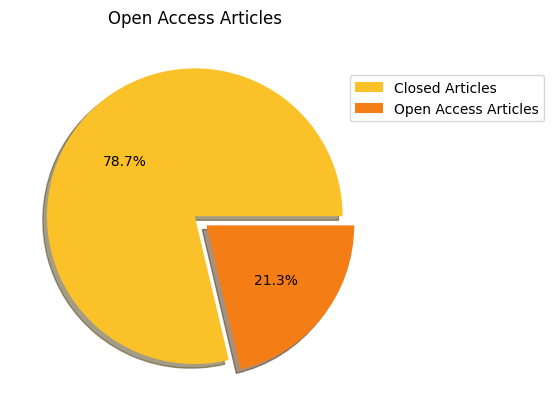

In [85]:
#Total versus OA

oa = len(doi_df[doi_df['standard_url'] == "creativecommons.org"])
not_oa = len(doi_df) - oa
explode = (0, 0.1)
legend = ["Closed Articles","Open Access Articles"]

plt.pie([not_oa,oa],autopct="%1.1f%%",explode=explode,shadow=True,startangle=0,colors=colors)
plt.legend(legend,bbox_to_anchor=(0.9,0.9))
plt.title("Open Access Articles")
plt.show()

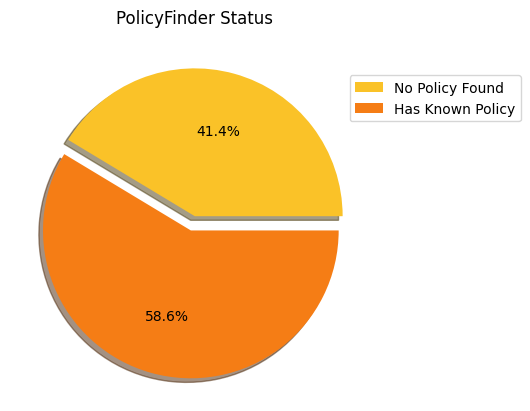

In [86]:
#Total versus unknown policy

no_policy = int(doi_df[doi_df['submitted_oa_policy'].isnull() & doi_df['accepted_oa_policy'].isnull() & doi_df['published_oa_policy'].isnull()]['DOI'].count())
has_policy = len(doi_df) - no_policy

explode = (0, 0.1)
legend = ["No Policy Found","Has Known Policy"]

plt.pie([no_policy,has_policy],autopct="%1.1f%%",explode=explode,shadow=True,startangle=0,colors=colors)
plt.legend(legend,bbox_to_anchor=(0.9,0.9))
plt.title("PolicyFinder Status")
plt.show()

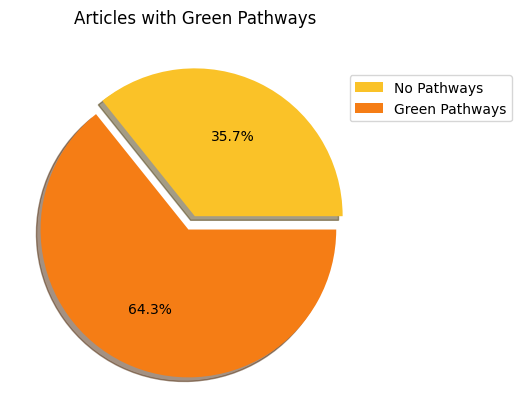

In [103]:
#Total v pathways

pathways = len(doi_green_eligible)
oa = len(doi_df[doi_df['standard_url'] == "creativecommons.org"])
no_pathways = len(doi_df) - oa - pathways
explode = (0, 0.1)
legend = ["No Pathways","Green Pathways"]

plt.pie([no_pathways,pathways],autopct="%1.1f%%",explode=explode,shadow=True,startangle=0,colors=colors)
plt.legend(legend,bbox_to_anchor=(0.9,0.9))
plt.title("Articles with Green Pathways")
plt.show()

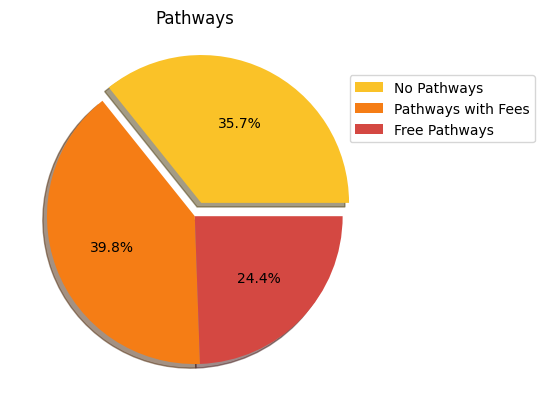

In [88]:
pathways = len(doi_green_eligible)
oa = len(doi_df[doi_df['standard_url'] == "creativecommons.org"])
no_pathways = len(doi_df) - oa - pathways
free_pathways = len(doi_green_eligible_free)
no_free_pathways = pathways - free_pathways
explode = (0.1, 0, 0)
legend = ["No Pathways","Pathways with Fees","Free Pathways"]

plt.pie([no_pathways,no_free_pathways,free_pathways],autopct="%1.1f%%",explode=explode,shadow=True,startangle=0,colors=colors)
plt.legend(legend,bbox_to_anchor=(0.9,0.9))
plt.title("Pathways")
plt.show()

## Potential Text of messages

In [135]:
doi_green_eligible_free[0:1]

,ORCID,DOI,issn,LICENSE_URL,standard_url,policy_uri,submitted_oa_policy,accepted_oa_policy,published_oa_policy
1,0000-0001-6297-4298,10.1108/JHOM-02-2023-0036,1477-7266,https://www.emerald.com/insight/site-policies,www.emerald.com,https://v2.sherpa.ac.uk/id/publication/2842,53:fee_no:Academic Social Networks / Scholarly...,54:fee_no:Academic Social Network/ Scholarly C...,NaN


In [188]:
def friendly_policy_text(raw_policy_text):
  '''Tries to make human readable policy text'''

  friendly_version = ""

  if ";" in raw_policy_text:
    friendly_version = raw_policy_text.split(":")[2]
  else:
    for policy in raw_policy_text.split(";"):
      friendly_verison += "\n"+policy.split(":")[2]

  return friendly_version

In [195]:
script_list = []
for key,value in doi_green_eligible_free.iterrows():
  script = ""
  script += "Your article https://dx.doi.org"+value['DOI']+" is eligible for deposit in the Brock University Digital Repository.\n"

  if not pd.isna(value['submitted_oa_policy']):
    script += "\nThe submitted version of your article can deposited without addition charges according to the following: "
    script += "\n"+friendly_policy_text(value['submitted_oa_policy'])+"\n"

  if not pd.isna(value['accepted_oa_policy']):
    script += "\nThe accepted version of your article can deposited without addition charges according to the following: "
    script += "\n"+friendly_policy_text(value['accepted_oa_policy'])+"\n"

  if not pd.isna(value['published_oa_policy']):
    script += "\nThe published version of your article can deposited without addition charges according to the following: "
    script += "\n"+friendly_policy_text(value['published_oa_policy'])+"\n"

  script += "\n\n"


  script += "\nMore policy details for this journal can be found here: "+value['policy_uri']
  script += " If you require more help please fell free to send an email or to consult https://brocku.ca/library/"

  script_list.append(script)

In [ ]:
doi_green_eligible['script'] = script_list